In [28]:
import matplotlib.pyplot as plt
import datetime as datetime
import numpy as np

In [6]:
def log():
	# read file into string
	with open('rl_template.py', 'r') as inputfile:
		textstr = inputfile.read()
		fn = datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S') + ".txt"
		
		with open("logs/"+fn, 'w') as outputfile:
			outputfile.write(textstr)


In [92]:
N     = 100  # The goal for truly winning
p     = 0.25 # Probability of winning one bet
gamma = 1    # discount factor

states          = [i for i in range(1, N)]   # The states of the game when defined as a Markov Decision Process.
											 # states[x] represents the state of currently having x chips.
v               = [0 for i in range(0, N+1)] # The current state value function. v[x] is the value of state x.
optimal_actions = [0 for i in range(0, N+1)] # List to represent optimal policy. 
											 # optimal_actions[x] should equal the optimal number of 
											 # coins to bet when you currently have x chips (you're in state x).

											 # For both v and optimal_actions, if x == 0 or N, v[x] = optimal_actions[x] = 0.

            
### Implement value iteration here ###

k = 0

while True:
    old_v = v[:]
    for i in range(len(states)):
        state = states[i]
        threshold = min(state, 100 - state)
        values = []
        for bet in range(1, threshold+1):
            # 1/4 -> state + bet || 3/4 -> state - bet
            # |reward| -> bet 
            value = (1/5) * (bet + gamma * v[state+bet]) + (4/5) * (gamma * v[state-bet] - bet)
            values.append(value)
            
        v[state] = np.max(values)
        
    if v == old_v:
        break
    k += 1
    
print(v)
    
for i in range(len(states)):
    state = states[i]
    threshold = min(state, 100 - state)
    args = []
    bets = []
    for bet in range(1, threshold+1):
        # 1/4 -> state + bet || 3/4 -> state - bet
        value = (1/5) * (bet + gamma * v[state+bet]) + (4/5) * (gamma * v[state-bet] - bet)
        args.append(value)
        bets.append(bet)
    optimal_actions[state] = bets[np.argmax(args)]
print(optimal_actions)
    

[0, -0.9985111814451271, -1.9925559072256354, -2.980378150034463, -3.962779536128177, -4.94088669950739, -5.9018907501723135, -6.836860504005515, -7.813897680640883, -8.777511607196796, -9.704433497536947, -10.609447544979982, -11.509453750861564, -12.198808945156102, -13.184302520027572, -14.152709359605911, -15.069488403204412, -16.022009285757438, -16.887558035983986, -17.559047156124883, -18.52216748768473, -19.41760742860595, -20.047237724899908, -20.934085942884764, -21.54726875430781, -21.0, -21.99404472578051, -22.97022362890254, -23.921512600137852, -24.851118144512707, -25.76354679802956, -26.60756300068925, -27.347442016022057, -28.255590722563532, -29.110046428787186, -29.817733990147783, -30.437790179919926, -31.037815003446248, -30.79523578062441, -31.737210080110284, -32.610837438423644, -33.27795361281765, -34.08803714302975, -34.550232143935936, -34.236188624499526, -35.08866995073892, -35.670429714423804, -35.188950899599625, -35.73634377153905, -35.18907501723124, -3

In [93]:
k

37

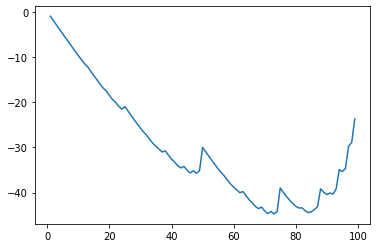

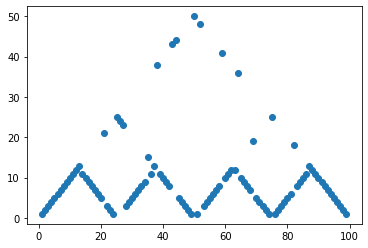

In [94]:
#log()

fig = plt.figure()
plt.plot(states, v[1:-1])
plt.show()

# Plot optimal policy for every state
plt.scatter(states, optimal_actions[1:-1])
plt.show()